In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
os.chdir('../')

In [2]:
test_sample_size = 5000
z_dim = 8

In [3]:
def sample_z(batch_size):
    return np.random.normal(0, 1, size=(batch_size, z_dim))

In [4]:
z = sample_z(test_sample_size)

<Figure size 4320x2160 with 0 Axes>

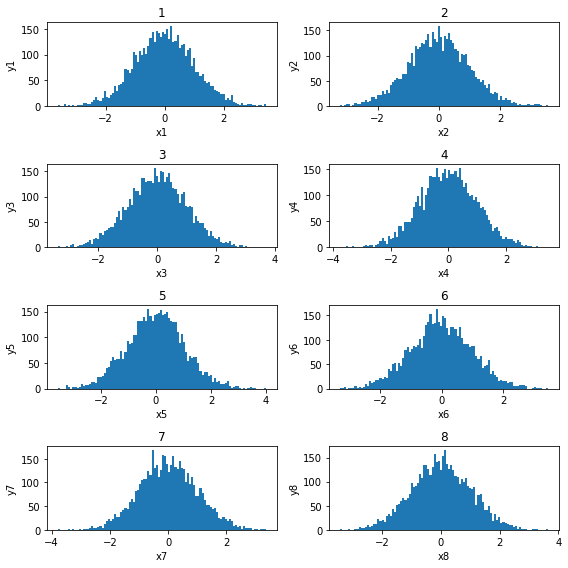

In [5]:
fig = plt.figure(figsize=(60, 30))
xaxes = ['x1','x2','x3','x4','x5','x6','x7','x8']
yaxes = ['y1','y2','y3','y4','y5','y6','y7','y8']
titles = '12345678'
f,a = plt.subplots(4, 2, figsize=(8,8))
a = a.ravel()
for idx,ax in enumerate(a):
    ax.hist(z[:,idx], bins=100)
    ax.set_xlabel(xaxes[idx])
    ax.set_ylabel(yaxes[idx])
    ax.set_title(titles[idx])
plt.tight_layout()

In [6]:
import pennylane as qml
import random
import os
import pandas as pd
import torch

In [7]:
qubits = 8
layer =1
resume_iters = 8

In [8]:
dev = qml.device('default.qubit', wires=qubits)
@qml.qnode(dev, interface='torch', diff_method='backprop')
def gen_circuit(w):
    # random noise as generator input
    z1 = random.uniform(-1, 1)
    z2 = random.uniform(-1, 1)
    
    # construct generator circuit for both atom vector and node matrix
    for i in range(qubits):
        qml.RY(np.arcsin(z1), wires=i)
        qml.RZ(np.arcsin(z2), wires=i)
    for l in range(layer):
        for i in range(qubits):
            qml.RY(w[i], wires=i)
        for i in range(qubits-1):
            qml.CNOT(wires=[i, i+1])
            qml.RZ(w[i+qubits], wires=i+1)
            qml.CNOT(wires=[i, i+1])
    return [qml.expval(qml.PauliZ(i)) for i in range(qubits)]

In [9]:
#model_dir_path = r'/home/ken/projects/QuantumGAN-PyTorch/results/quantum-GAN/20211110_110728/train/model_dir'

In [10]:
model_dir_path = r'/home/ken/projects/QuantumGAN-PyTorch/'

In [11]:
weights_pth = os.path.join(model_dir_path, 'molgan_red_weights.csv')

In [12]:
weights = pd.read_csv(weights_pth, header=None).iloc[resume_iters-1, 1:].values

In [13]:
gen_weights = torch.tensor(list(weights), requires_grad=True)

In [14]:
gen_weights

tensor([-1.6245,  1.5505,  1.5737,  1.5134, -1.5452, -1.5611, -1.5340,  1.4883,
         0.6353,  1.3074, -3.0123,  2.9525,  2.0888, -1.8074, -1.9992],
       dtype=torch.float64, requires_grad=True)

In [15]:
sample_list = [gen_circuit(gen_weights) for i in range(test_sample_size)]

In [16]:
z = torch.stack(tuple(sample_list)).float().detach().numpy()

<Figure size 4320x2160 with 0 Axes>

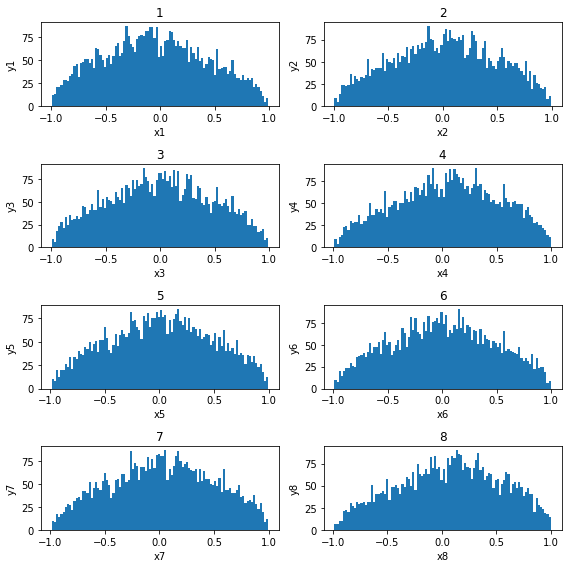

In [17]:
fig = plt.figure(figsize=(60, 30))
xaxes = ['x1','x2','x3','x4','x5','x6','x7','x8']
yaxes = ['y1','y2','y3','y4','y5','y6','y7','y8']
titles = '12345678'
f,a = plt.subplots(4, 2, figsize=(8,8))
a = a.ravel()
for idx,ax in enumerate(a):
    ax.hist(z[:,idx], bins=100)
    ax.set_xlabel(xaxes[idx])
    ax.set_ylabel(yaxes[idx])
    ax.set_title(titles[idx])
plt.tight_layout()